# Graph Dynamics: Consensus via Graph Laplacian

This notebook illustrates the dynamics
\[
\dot{x}(t) = -L x(t),
\]
where \(L\) is the graph Laplacian of a small graph (here, a 5-node ring).

We:
- construct the graph Laplacian,
- simulate the ODE numerically,
- visualize node trajectories over time,
- visualize initial and final node states on the graph.

Figures are saved into `figs/` for inclusion in the LaTeX notes.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.makedirs("figs", exist_ok=True)

rng = np.random.default_rng(42)


## Build a 5-Node Ring Graph and Its Laplacian

Nodes: \(0,1,2,3,4\).  
Edges: \((0,1), (1,2), (2,3), (3,4), (4,0)\).

Laplacian: \(L = D - A\), where \(A\) is the adjacency matrix.


In [2]:
# Adjacency matrix for 5-node ring
n = 5
A = np.zeros((n, n))
for i in range(n):
    j_next = (i + 1) % n
    A[i, j_next] = 1.0
    A[j_next, i] = 1.0

# Degree matrix and Laplacian
D = np.diag(A.sum(axis=1))
L = D - A

print("Adjacency matrix A:\n", A)
print("Laplacian L:\n", L)


Adjacency matrix A:
 [[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]]
Laplacian L:
 [[ 2. -1.  0.  0. -1.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [-1.  0.  0. -1.  2.]]


## Simulate \(\dot{x} = -L x\)

We use a forward Euler method to simulate over a time horizon,
starting from an initial condition \(x(0)\).


In [3]:
# Initial condition: random
x0 = rng.normal(size=n)

t_final = 5.0
dt = 0.005
num_steps = int(t_final / dt)

x = x0.copy()
traj = [x.copy()]
times = [0.0]

for k in range(num_steps):
    x = x - dt * (L @ x)
    if (k+1) % 10 == 0:
        traj.append(x.copy())
        times.append((k+1) * dt)

traj = np.stack(traj, axis=0)
times = np.array(times)

print("Trajectory shape:", traj.shape)


Trajectory shape: (101, 5)


Saved figure: figs/graph_dynamics_node_traces.png


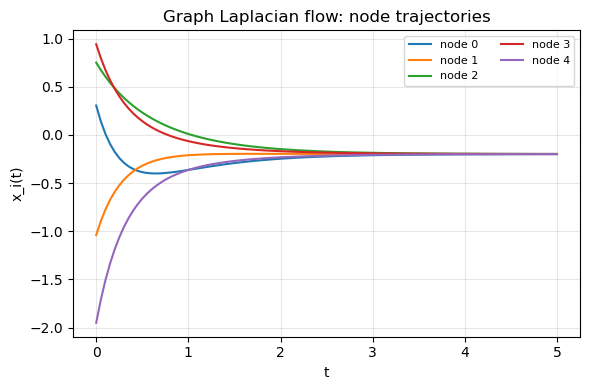

In [4]:
# Plot node trajectories over time
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

for i in range(n):
    ax.plot(times, traj[:, i], label=f"node {i}")

ax.set_xlabel("t")
ax.set_ylabel("x_i(t)")
ax.set_title("Graph Laplacian flow: node trajectories")
ax.grid(alpha=0.3)
ax.legend(ncol=2, fontsize=8)

fig.tight_layout()
fig_path = os.path.join("figs", "graph_dynamics_node_traces.png")
fig.savefig(fig_path, dpi=200, bbox_inches="tight")
print("Saved figure:", fig_path)

plt.show()


## Visualize Node Values on the Graph (Initial vs Final)

We place the 5 nodes on a circle and color them by their values
at \(t=0\) and at the final time.


Saved figure: figs/graph_dynamics_graph_states.png


/var/folders/s5/8pby83n5305c0l0dvb7d7p5c0000gr/T/ipykernel_43614/2050939436.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


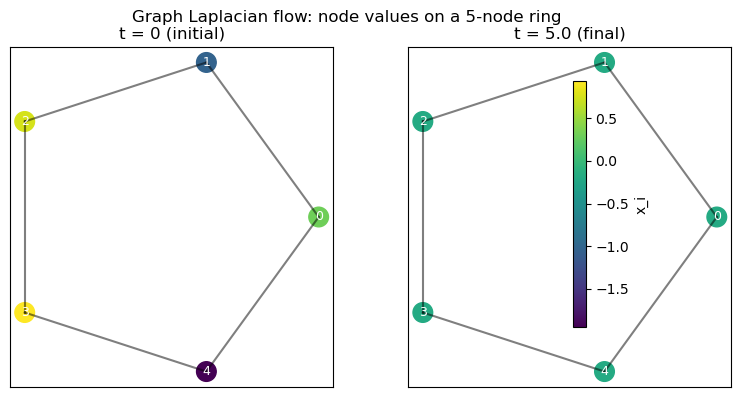

In [5]:
# Node positions on a circle
angles = np.linspace(0, 2*np.pi, n, endpoint=False)
pos_x = np.cos(angles)
pos_y = np.sin(angles)

x_init = traj[0]
x_final = traj[-1]

vmin = min(x_init.min(), x_final.min())
vmax = max(x_init.max(), x_final.max())

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for ax, x_vals, title in zip(
    axes,
    [x_init, x_final],
    ["t = 0 (initial)", f"t = {times[-1]:.1f} (final)"]
):
    sc = ax.scatter(pos_x, pos_y, c=x_vals, s=200, cmap="viridis",
                    vmin=vmin, vmax=vmax)
    for i in range(n):
        ax.text(pos_x[i], pos_y[i], str(i), ha="center", va="center",
                color="white", fontsize=9)
    # draw edges
    for i in range(n):
        j_next = (i + 1) % n
        ax.plot([pos_x[i], pos_x[j_next]], [pos_y[i], pos_y[j_next]],
                "-k", alpha=0.5)
    ax.set_aspect("equal")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)

cbar = fig.colorbar(sc, ax=axes.ravel().tolist(), shrink=0.8)
cbar.set_label("x_i")

fig.suptitle("Graph Laplacian flow: node values on a 5-node ring")
fig.tight_layout()
fig_path = os.path.join("figs", "graph_dynamics_graph_states.png")
fig.savefig(fig_path, dpi=200, bbox_inches="tight")
print("Saved figure:", fig_path)

plt.show()
